Te retamos a que encuentres el mejor modelo de clasificación automática de suelos en base a las imágenes proporcionadas por el satélite Sentinel II del servicio Copernicus de la Agencia Espacial Europea.
Variables

Los ficheros contienen un total 55 variables: las 3 primeras de ellas relativas a la identificación de los registros y las 8 últimas variables son distintas referencias geométricas y relativas al entorno (geometría del edificio, métricas geométricas generadas automáticamente -GEOM-, metros cuadrados, año construcción y nº de plantas de los edificios del entorno).

Las imágenes satelitales se han tratado y se ha extraído información de 4 canales (R, G, B y NIR), correspondientes a las bandas de color rojo, verde y azul, y el infrarrojo cercano. El valor mostrado corresponde a la intensidad por deciles en cada imagen. Estas variables empiezan con la letra “Q”.

El fichero "Modelar_UH2020.txt" tiene, adicionalmente como última variable, la clase a predecir.
El ámbito geográfico de las imágenes es una zona concreta del municipio Madrid. La referencia (ID) es distinta y representativa de un elemento diferenciado.

In [ ]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 1.0.1


In [2]:
# Cargando las librerías por categoría
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Generic
import os
import datetime
import itertools
import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [9]:
ruta=("/content/Estimar_UH2020.txt")
df= pd.read_csv(ruta,sep = "|")

In [10]:
df.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID
0,44198C2A811A4DF4,2200905624,165480229,0.000001,445.999637,634.001172,780.000568,902.004053,1025.997009,1157.997681,1304.999585,1501.002661,1830.998926,7098.504905,0.000002,383.999710,528.000317,633.998871,724.998218,811.000366,901.999060,1010.996002,1162.000439,1438.003833,6630.661924,147.000473,461.000000,493.000122,522.999878,550.000061,575.999939,604.999817,647.000122,707.000122,825.000891,2962.301546,1.063087e-05,631.998126,889.002136,1084.999243,1259.988721,1432.501221,1619.998560,1835.995764,2120.993359,2545.997754,6803.875107,283.593030,0.046741,0.014588,0.011298,0.774503,1994.0,5.0,4
1,216F638609E0E39E,2207436564,165625751,0.000000,385.000995,580.005762,737.004449,873.996460,1005.998779,1141.001758,1296.997083,1505.996753,1822.994031,5364.803157,0.000000,346.996735,495.997705,602.000580,701.000647,795.999268,889.995288,995.997449,1138.001709,1387.002820,5534.496367,99.000961,483.999969,521.000342,547.000183,570.000061,591.999878,615.798437,643.000183,682.000122,754.700116,2182.966982,7.401012e-12,558.004102,809.008313,1002.009210,1175.000195,1327.996887,1486.795728,1666.104956,1884.994067,2220.990137,5544.670485,357.712450,0.378483,0.041085,0.025753,0.626835,1968.0,8.0,3
2,FFFCEFB11E257364,2200313961,165752898,0.000000,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,1370.990234,1590.001099,1905.991516,7074.674140,0.000000,291.003632,458.000061,579.999023,685.998840,780.000336,878.996094,992.996582,1149.010254,1425.496948,8340.301104,214.000305,472.000015,508.000153,539.000061,567.999878,591.000000,614.999695,638.999847,670.999939,722.999695,1542.247090,0.000000e+00,489.004868,776.002319,992.004883,1186.992432,1364.991089,1551.001343,1759.008057,2022.004272,2421.002441,8827.104856,160.979017,0.306545,0.034637,0.054977,1.587207,1968.0,5.0,7
3,596C5C8CE10BCF,2199220382,166288192,0.000000,173.999956,218.000000,261.999713,315.999951,408.000565,560.000500,700.697351,863.000671,1200.897534,7689.470151,0.000006,251.000169,291.999847,328.000739,369.998914,434.998367,545.000671,664.699524,792.998560,1068.003235,7690.967231,3.000620,130.999969,151.000061,175.999939,206.000137,242.000015,318.000031,367.999969,457.000299,691.000049,1713.185116,5.006439e+00,1307.006531,1527.999072,1675.999512,1798.999854,1924.994751,2054.998730,2212.999951,2422.002002,2752.005786,7734.759269,9088.678448,0.338955,0.006846,0.005448,0.795725,1993.0,6.0,6
4,F931B9FA2A8641D1,2209143550,165253334,0.000007,588.002014,738.999451,848.001282,954.000244,1074.000183,1228.998291,1416.999817,1639.999268,1937.999329,7535.480762,0.000013,513.999084,645.999207,739.015839,831.997925,931.005920,1050.008301,1203.999451,1395.999023,1677.999146,7280.822226,47.000126,398.000137,462.999939,512.006744,571.000061,633.000397,706.000061,796.000000,910.001160,1102.999512,2955.738621,2.748954e-04,1103.002808,1350.003296,1535.006531,1692.002075,1839.000488,1996.000000,2159.998657,2366.000000,2712.997681,7435.991490,994.424368,0.581476,0.036470,0.016033,0.439638,1964.0,4.0,7


In [11]:
df.shape 

(1228, 55)

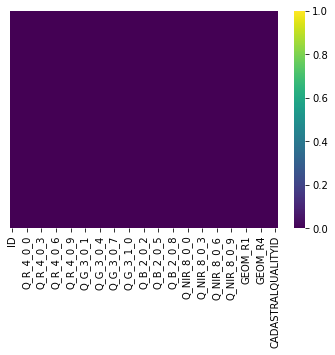

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1228 non-null   object 
 1   X                   1228 non-null   int64  
 2   Y                   1228 non-null   int64  
 3   Q_R_4_0_0           1228 non-null   float64
 4   Q_R_4_0_1           1227 non-null   float64
 5   Q_R_4_0_2           1227 non-null   float64
 6   Q_R_4_0_3           1227 non-null   float64
 7   Q_R_4_0_4           1227 non-null   float64
 8   Q_R_4_0_5           1227 non-null   float64
 9   Q_R_4_0_6           1227 non-null   float64
 10  Q_R_4_0_7           1227 non-null   float64
 11  Q_R_4_0_8           1227 non-null   float64
 12  Q_R_4_0_9           1227 non-null   float64
 13  Q_R_4_1_0           1227 non-null   float64
 14  Q_G_3_0_0           1227 non-null   float64
 15  Q_G_3_0_1           1227 non-null   float64
 16  Q_G_3_

In [14]:
ruta_2=("/content/Modelar_UH2020.txt")
df_2= pd.read_csv(ruta_2,sep = "|")

In [15]:
df_2.tail()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
19408,6B20D3746BA88C46,2245960227,165309437.0,0.000000,699.999847,824.995422,921.999847,1007.000732,1100.005859,1212.996948,1377.001221,1635.000488,2016.501465,6308.768261,0.000000,600.999756,689.000671,756.000488,828.999268,913.999756,1017.999329,1162.993225,1373.002441,1672.998230,6383.048523,155.000671,387.000076,438.000183,484.000305,530.000061,585.000397,651.000244,744.999542,859.999878,958.999878,4529.420421,0.000034,1384.000366,1588.000366,1743.001221,1898.001221,2073.997803,2251.000732,2449.000732,2666.991455,2963.996582,5903.570410,62.036535,0.473617,0.081044,0.094202,1.162357,2007.0,1.0,4,RESIDENTIAL
19409,95A83F22103E225F,2225393545,165679400.0,0.000000,301.999344,462.999268,591.002167,706.997803,816.005005,935.002319,1073.998962,1266.998047,1591.995605,9086.300616,0.000000,286.000931,416.999847,517.996643,600.999817,682.997314,766.005676,863.998871,999.002747,1249.003357,7965.635607,104.000000,385.000168,433.000458,465.000198,494.000000,523.000153,551.999939,586.000214,631.998108,706.000488,1480.282977,0.000006,637.006409,907.000000,1082.006226,1242.999512,1399.002930,1569.993530,1750.993530,1970.002441,2305.497803,8862.973623,269.239080,0.301710,0.032743,0.034224,1.045210,1997.0,2.0,3,RESIDENTIAL
19410,3C04622AAEC6F9A1,2169581573,165507079.0,0.000001,162.000359,198.000610,245.000572,329.001068,493.999451,700.002563,896.997528,1136.000488,1497.995056,15770.624163,0.000574,286.000977,329.000580,366.999847,423.000366,526.998932,665.004150,808.003754,977.000488,1274.495972,6047.069578,0.000217,132.999969,150.999985,168.999985,200.000061,382.000000,496.999817,581.999817,671.999756,814.999329,1904.192509,0.001982,1333.002991,1615.002808,1806.499023,1958.004639,2096.998291,2227.000732,2369.005371,2552.989990,2871.995728,6006.857875,112.813950,0.538512,0.060241,0.079239,1.315372,1988.0,1.0,4,PUBLIC
19411,FC2C2E46E4A5C9A3,2203706274,165735604.0,0.000000,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,1370.990234,1590.001099,1905.991516,7074.674140,0.000000,291.003632,458.000061,579.999023,685.998840,780.000336,878.996094,992.996582,1149.010254,1425.496948,8340.301104,214.000305,472.000015,508.000153,539.000061,567.999878,591.000000,614.999695,638.999847,670.999939,722.999695,1542.247090,0.000000,489.004868,776.002319,992.004883,1186.992432,1364.991089,1551.001343,1759.008057,2022.004272,2421.002441,8827.104856,1736.120892,0.425312,0.016661,0.014704,0.882538,1910.0,1.0,8,RETAIL
19412,CE8A894ADF4C1EC6,22770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_2.shape 

(19413, 56)

In [17]:
df_2.size #Tenemos 407624 filas

1087128

In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  19413 non-null  object 
 1   X                   19413 non-null  int64  
 2   Y                   19412 non-null  float64
 3   Q_R_4_0_0           19412 non-null  float64
 4   Q_R_4_0_1           19412 non-null  float64
 5   Q_R_4_0_2           19412 non-null  float64
 6   Q_R_4_0_3           19412 non-null  float64
 7   Q_R_4_0_4           19412 non-null  float64
 8   Q_R_4_0_5           19412 non-null  float64
 9   Q_R_4_0_6           19412 non-null  float64
 10  Q_R_4_0_7           19412 non-null  float64
 11  Q_R_4_0_8           19412 non-null  float64
 12  Q_R_4_0_9           19412 non-null  float64
 13  Q_R_4_1_0           19412 non-null  float64
 14  Q_G_3_0_0           19412 non-null  float64
 15  Q_G_3_0_1           19412 non-null  float64
 16  Q_G_

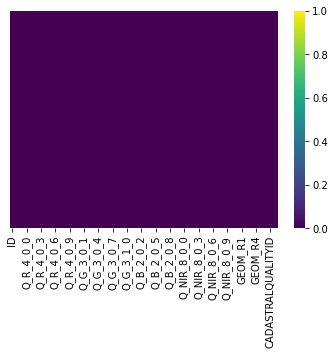

In [19]:
sns.heatmap(df_2.isnull(),yticklabels=False,cmap="viridis")  #No hay NAN (muy pocos, parece que solo en las últimas columnas)

In [20]:
df_2.isnull().sum()  #Hay 20 Nan en las columnas CONTRUCTIONYEAR y MAXBUILDINGFLOOR.

ID                    0
X                     0
Y                     1
Q_R_4_0_0             1
Q_R_4_0_1             1
Q_R_4_0_2             1
Q_R_4_0_3             1
Q_R_4_0_4             1
Q_R_4_0_5             1
Q_R_4_0_6             1
Q_R_4_0_7             1
Q_R_4_0_8             1
Q_R_4_0_9             1
Q_R_4_1_0             1
Q_G_3_0_0             1
Q_G_3_0_1             1
Q_G_3_0_2             1
Q_G_3_0_3             1
Q_G_3_0_4             1
Q_G_3_0_5             1
Q_G_3_0_6             1
Q_G_3_0_7             1
Q_G_3_0_8             1
Q_G_3_0_9             1
Q_G_3_1_0             1
Q_B_2_0_0             1
Q_B_2_0_1             1
Q_B_2_0_2             1
Q_B_2_0_3             1
Q_B_2_0_4             1
Q_B_2_0_5             1
Q_B_2_0_6             1
Q_B_2_0_7             1
Q_B_2_0_8             1
Q_B_2_0_9             1
Q_B_2_1_0             1
Q_NIR_8_0_0           1
Q_NIR_8_0_1           1
Q_NIR_8_0_2           1
Q_NIR_8_0_3           1
Q_NIR_8_0_4           1
Q_NIR_8_0_5     

In [21]:
df_2[df_2['MAXBUILDINGFLOOR'].isnull()].equals(df_2[df_2['CADASTRALQUALITYID'].isnull()]) #Para ver si corresonden a las mismas filas

True

In [22]:
df_2[df_2['MAXBUILDINGFLOOR'].isnull()].groupby(['CLASE'])[['CLASE']].count()

,CLASE
CLASE,
AGRICULTURE,3
INDUSTRIAL,1
RETAIL,1


In [23]:
df_2['MAXBUILDINGFLOOR'].describe()

count    19407.000000
mean         3.779100
std          2.954916
min          0.000000
25%          1.000000
50%          4.000000
75%          5.000000
max         25.000000
Name: MAXBUILDINGFLOOR, dtype: float64

In [ ]:
df_2['CADASTRALQUALITYID'].describe()

count     103210
unique        12
top            4
freq       24621
Name: CADASTRALQUALITYID, dtype: object

In [ ]:
df_2['MAXBUILDINGFLOOR'].fillna(3.76, inplace=True) #Inputamos los nan por la media
df_2['CADASTRALQUALITYID'].fillna('7', inplace=True) #Inputamos los nan por la moda

In [ ]:
df_2.isnull().sum() 

ID                    0
X                     0
Y                     0
Q_R_4_0_0             0
Q_R_4_0_1             0
Q_R_4_0_2             0
Q_R_4_0_3             0
Q_R_4_0_4             1
Q_R_4_0_5             1
Q_R_4_0_6             1
Q_R_4_0_7             1
Q_R_4_0_8             1
Q_R_4_0_9             1
Q_R_4_1_0             1
Q_G_3_0_0             1
Q_G_3_0_1             1
Q_G_3_0_2             1
Q_G_3_0_3             1
Q_G_3_0_4             1
Q_G_3_0_5             1
Q_G_3_0_6             1
Q_G_3_0_7             1
Q_G_3_0_8             1
Q_G_3_0_9             1
Q_G_3_1_0             1
Q_B_2_0_0             1
Q_B_2_0_1             1
Q_B_2_0_2             1
Q_B_2_0_3             1
Q_B_2_0_4             1
Q_B_2_0_5             1
Q_B_2_0_6             1
Q_B_2_0_7             1
Q_B_2_0_8             1
Q_B_2_0_9             1
Q_B_2_1_0             1
Q_NIR_8_0_0           1
Q_NIR_8_0_1           1
Q_NIR_8_0_2           1
Q_NIR_8_0_3           1
Q_NIR_8_0_4           1
Q_NIR_8_0_5     

Análisis de la variable dependiente(CLASE)

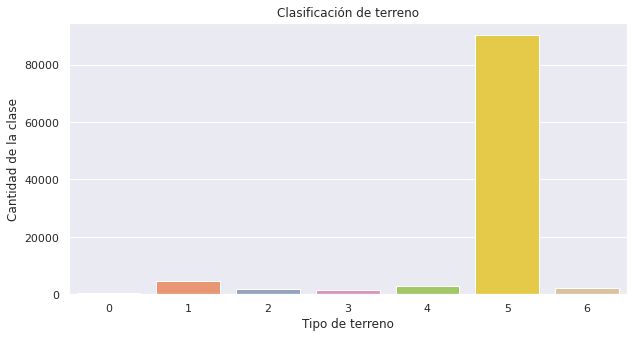

In [ ]:
plt.figure(figsize=(10,5))  #La clase 5 (residencial) es la mayoritaria
sns.set(style = "darkgrid")
ax = sns.countplot (x ="CLASE" , data = df_2, palette = "Set2")
plt.title("Clasificación de terreno")
plt.xlabel('Tipo de terreno')
plt.ylabel('Cantidad de la clase')
plt.show()

In [ ]:
print("Clases: ", df_2['CLASE'].unique())
for c in df_2['CLASE'].unique():
    print(f"El porcentaje de muestras de tipo {c} es {(sum(df_2['CLASE']==c) / df_2.shape[0]):.2f}")

Clases:  [5, 1, 4, 2, 3, 6, 0]
Categories (7, int64): [5, 1, 4, 2, 3, 6, 0]
El porcentaje de muestras de tipo 5 es 0.87
El porcentaje de muestras de tipo 1 es 0.04
El porcentaje de muestras de tipo 4 es 0.03
El porcentaje de muestras de tipo 2 es 0.02
El porcentaje de muestras de tipo 3 es 0.01
El porcentaje de muestras de tipo 6 es 0.02
El porcentaje de muestras de tipo 0 es 0.00


In [ ]:
df_2.CLASE.unique()

array(['RESIDENTIAL', 'INDUSTRIAL', 'PUBLIC', 'OFFICE', 'OTHER', 'RETAIL',
       'AGRICULTURE'], dtype=object)

In [ ]:
df_2.CLASE.describe()  #Clase mayoritaria.Residencial 

count          103230
unique              7
top       RESIDENTIAL
freq            90173
Name: CLASE, dtype: object

In [ ]:
df_2.CLASE.value_counts()

RESIDENTIAL    90173
INDUSTRIAL      4490
PUBLIC          2976
RETAIL          2093
OFFICE          1828
OTHER           1332
AGRICULTURE      338
Name: CLASE, dtype: int64

In [ ]:
df_2.tail()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
103225,C5FD596EB22DB167,2225843339,165482267,2.183254e-11,427.999246,604.004626,742.996454,866.005859,990.999512,1124.001465,1268.997705,1454.995068,1761.991003,6043.279376,7.424196e-11,386.007083,515.002246,610.000470,689.002856,769.000488,855.000195,957.999896,1091.996729,1331.002258,5814.663998,225.000305,425.999817,473.000153,504.999869,531.000000,555.000000,580.000000,610.000305,658.999573,746.999878,1633.034250,0.000463,720.897247,983.006470,1183.003955,1355.991968,1526.988647,1713.000562,1926.990320,2200.995850,2649.989893,7697.199141,118.691883,0.431234,0.058275,0.062346,1.069859,1970,5.0,6,5
103226,A51D42F2EAB0E15E,2196745557,165159412,1.108565e-06,544.002496,690.999658,812.997748,933.008777,1055.998779,1187.997485,1340.002747,1536.998096,1853.001172,6158.499632,1.276654e-07,519.998663,634.000708,721.000183,804.002759,896.001678,1001.999707,1131.999744,1299.000488,1585.001050,6208.522531,153.001801,444.000000,489.000153,522.999878,554.999939,591.999695,642.999390,707.000488,804.000061,1027.000000,4181.606740,0.002002,978.000153,1236.000195,1436.998584,1613.005957,1790.007446,1984.994580,2210.999438,2491.004199,2952.010083,5657.631409,62.673700,0.469740,0.090090,0.083195,0.923461,1994,1.0,4,5
103227,9B75473FE6396523,2261090490,165673813,0.000000e+00,572.003784,765.000366,924.996460,1097.998169,1329.000732,1609.997925,1974.998596,2479.006348,2936.000854,13442.758452,0.000000e+00,533.001495,693.000549,821.999908,964.001343,1157.002747,1410.990601,1745.000427,2217.996582,2621.999146,14899.767649,183.003250,481.000183,566.000366,653.000092,764.999939,932.500824,1135.000000,1366.999207,1605.000122,1810.999756,3280.354361,0.000002,954.001862,1268.003418,1498.000000,1691.999023,1893.008118,2127.004883,2416.000977,2761.000488,3162.000122,14891.610338,303.685474,0.938707,0.035331,0.087489,2.476290,1945,1.0,9,1
103228,3E566F8A461FDBA3,2219731066,165775921,0.000000e+00,341.999185,508.998688,644.999683,767.999805,889.001648,1019.992651,1173.999329,1378.988965,1688.000818,7106.769518,0.000000e+00,333.000500,457.000580,554.002338,642.003223,726.998322,816.000122,924.001355,1076.002002,1327.001123,7081.591588,83.000069,389.000668,436.000000,471.000000,503.000153,540.000122,581.000000,622.000061,667.999878,757.999860,1445.184570,0.000010,762.999640,1029.999609,1232.001550,1412.003369,1591.506287,1767.002051,1955.995447,2189.004102,2570.995068,6719.040030,100.580961,0.448732,0.056818,0.078521,1.381964,1976,1.0,5,5
103229,0E6F8A7388F1FF25,2260508805,165584719,4.849879e-11,400.998581,570.003540,684.001343,800.005432,932.995483,1089.997925,1291.003601,1552.997070,1982.998657,6031.623933,2.648995e-07,394.005188,531.997803,634.001160,734.999329,835.000275,947.996094,1092.000122,1296.995972,1643.997131,6624.539444,0.000000,290.999817,377.000061,456.999969,526.000122,596.000122,655.000122,718.999969,806.999573,958.999969,2024.257285,0.000113,1003.999664,1323.008301,1525.000732,1694.001221,1874.000366,2088.002930,2332.001221,2619.002441,3040.000610,5979.746243,389.633040,0.635894,0.053563,0.030469,0.568845,1971,4.0,5,5


Análisis de las variables no relativas a imágenes

In [ ]:
#Variable MAXBUILDINGFLOOR

In [ ]:
df_2.MAXBUILDINGFLOOR.unique()

array([ 0.  ,  1.  ,  8.  ,  4.  ,  7.  ,  2.  ,  5.  ,  3.  , 11.  ,
        9.  ,  6.  , 12.  , 16.  , 10.  , 25.  , 13.  , 14.  , 22.  ,
       15.  , 17.  , 24.  , 19.  , 23.  , 18.  , 21.  ,  3.76, 20.  ])

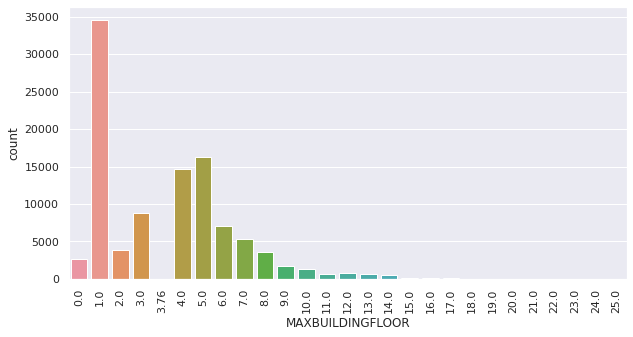

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='MAXBUILDINGFLOOR', data=df_2)
x = plt.xticks(rotation=90)

In [ ]:
#Comprobación de inf en el DataFrame
np.isinf(df_2['MAXBUILDINGFLOOR']).values.sum()

0

In [ ]:
#Variable CADASTRALQUALITYID

In [ ]:
df_2.CADASTRALQUALITYID.unique()  #Tratar las clases A,B y C

array(['2', '8', '5', '6', '4', '7', '3', 'C', '1', '9', 'B', 'A'],
      dtype=object)

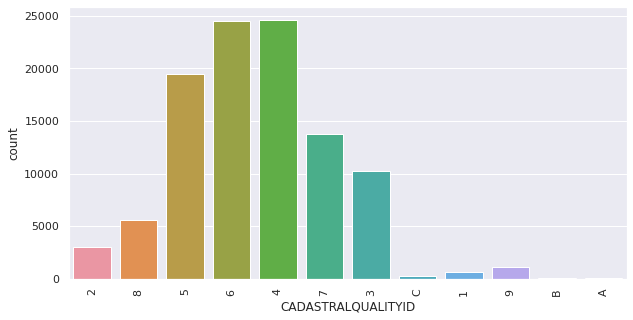

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='CADASTRALQUALITYID', data=df_2)
x = plt.xticks(rotation=90)

In [ ]:
#Variable CONTRUCTIONYEAR

In [ ]:
df_2.CONTRUCTIONYEAR.unique()

array([2002, 1949, 1986, 1999, 1966, 1992, 1982, 1952, 1970, 1990, 1950,
       2003, 1972, 1955, 1960, 1984, 2000, 1969, 1973, 1956, 2016, 1974,
       1957, 1968, 1976, 2005, 1962, 1961, 2004, 1980, 1965, 1946, 1978,
       1920, 2010, 1991, 1997, 1979, 1988, 1959, 1964, 2006, 2014, 1993,
       2012, 1998, 1983, 1975, 1994, 1930, 1941, 2001, 1954, 1963, 1923,
       1958, 1987, 1981, 1971, 1989, 1905, 2015, 1951, 1977, 1940, 1996,
       1953, 1934, 2007, 1935, 1927, 1900, 1995, 1948, 2011, 1985, 1967,
       2008, 2013, 1925, 1942, 1922, 1945, 1947, 2009, 1944, 1910, 1887,
       1915, 1928, 1929, 1924, 1931, 1943, 1916, 1918, 1938, 1890, 1939,
       1936, 1908, 1898, 1926, 1932, 1880, 1903, 1933, 1937, 1820, 2017,
       1902, 1921, 1912, 1917, 1906, 1914, 1860, 1892, 1884, 1919, 1894,
       1911, 1885, 1904, 1907, 1913, 1850, 1909, 1886, 1901, 1883, 1866,
       1899, 1870, 1895, 1891, 1871, 1875, 1897, 1888, 1893, 1881, 1896,
       1862, 1863, 1882, 1876, 1879, 1840, 1864, 18

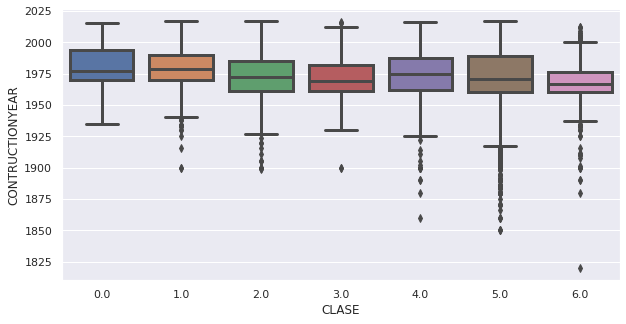

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_2["CLASE"], y=df_2["CONTRUCTIONYEAR"], linewidth=3);

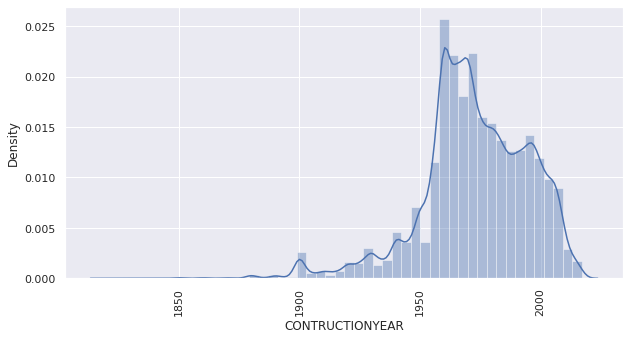

In [ ]:
#Distribución asimétrica a la derecha (edificios nuevos)
plt.figure(figsize=(10,5))
sns.distplot(df_2.CONTRUCTIONYEAR)
x = plt.xticks(rotation=90)

Análisis de las variables de localización (X e Y)

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 19.0 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 


In [ ]:
import geopandas

In [ ]:
#Creamos un DataFrame con las coordenadas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.X, df.Y))

In [ ]:
gdf.head() #Se ha creado la columna de geometry

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,geometry
0,44198C2A811A4DF4,2200905624,165480229,0.000001,445.999637,634.001172,780.000568,902.004053,1025.997009,1157.997681,1304.999585,1501.002661,1830.998926,7098.504905,0.000002,383.999710,528.000317,633.998871,724.998218,811.000366,901.999060,1010.996002,1162.000439,1438.003833,6630.661924,147.000473,461.000000,493.000122,522.999878,550.000061,575.999939,604.999817,647.000122,707.000122,825.000891,2962.301546,1.063087e-05,631.998126,889.002136,1084.999243,1259.988721,1432.501221,1619.998560,1835.995764,2120.993359,2545.997754,6803.875107,283.593030,0.046741,0.014588,0.011298,0.774503,1994,5.0,4,POINT (2200905624.000 165480229.000)
1,216F638609E0E39E,2207436564,165625751,0.000000,385.000995,580.005762,737.004449,873.996460,1005.998779,1141.001758,1296.997083,1505.996753,1822.994031,5364.803157,0.000000,346.996735,495.997705,602.000580,701.000647,795.999268,889.995288,995.997449,1138.001709,1387.002820,5534.496367,99.000961,483.999969,521.000342,547.000183,570.000061,591.999878,615.798437,643.000183,682.000122,754.700116,2182.966982,7.401012e-12,558.004102,809.008313,1002.009210,1175.000195,1327.996887,1486.795728,1666.104956,1884.994067,2220.990137,5544.670485,357.712450,0.378483,0.041085,0.025753,0.626835,1968,8.0,3,POINT (2207436564.000 165625751.000)
2,FFFCEFB11E257364,2200313961,165752898,0.000000,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,1370.990234,1590.001099,1905.991516,7074.674140,0.000000,291.003632,458.000061,579.999023,685.998840,780.000336,878.996094,992.996582,1149.010254,1425.496948,8340.301104,214.000305,472.000015,508.000153,539.000061,567.999878,591.000000,614.999695,638.999847,670.999939,722.999695,1542.247090,0.000000e+00,489.004868,776.002319,992.004883,1186.992432,1364.991089,1551.001343,1759.008057,2022.004272,2421.002441,8827.104856,160.979017,0.306545,0.034637,0.054977,1.587207,1968,5.0,7,POINT (2200313961.000 165752898.000)
3,596C5C8CE10BCF,2199220382,166288192,0.000000,173.999956,218.000000,261.999713,315.999951,408.000565,560.000500,700.697351,863.000671,1200.897534,7689.470151,0.000006,251.000169,291.999847,328.000739,369.998914,434.998367,545.000671,664.699524,792.998560,1068.003235,7690.967231,3.000620,130.999969,151.000061,175.999939,206.000137,242.000015,318.000031,367.999969,457.000299,691.000049,1713.185116,5.006439e+00,1307.006531,1527.999072,1675.999512,1798.999854,1924.994751,2054.998730,2212.999951,2422.002002,2752.005786,7734.759269,9088.678448,0.338955,0.006846,0.005448,0.795725,1993,6.0,6,POINT (2199220382.000 166288192.000)
4,F931B9FA2A8641D1,2209143550,165253334,0.000007,588.002014,738.999451,848.001282,954.000244,1074.000183,1228.998291,1416.999817,1639.999268,1937.999329,7535.480762,0.000013,513.999084,645.999207,739.015839,831.997925,931.005920,1050.008301,1203.999451,1395.999023,1677.999146,7280.822226,47.000126,398.000137,462.999939,512.006744,571.000061,633.000397,706.000061,796.000000,910.001160,1102.999512,2955.738621,2.748954e-04,1103.002808,1350.003296,1535.006531,1692.002075,1839.000488,1996.000000,2159.998657,2366.000000,2712.997681,7435.991490,994.424368,0.581476,0.036470,0.016033,0.439638,1964,4.0,7,POINT (2209143550.000 165253334.000)


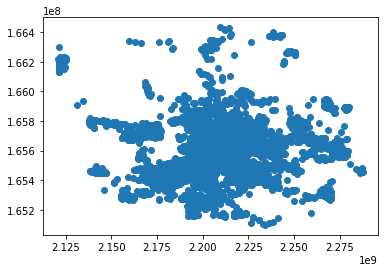

In [ ]:
#Las variables X e Y pueden corresponder a lat y lon.
plt.scatter(x=df['X'], y=df['Y'])
plt.show()

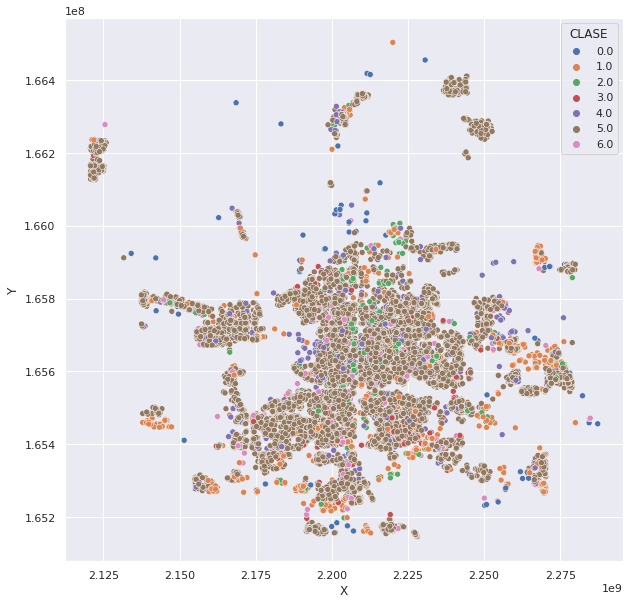

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='X', y='Y', data=df_2, hue= df_2.CLASE);

In [ ]:
def seleccion_parejas(df):
    parejas=[]
    seleccion_numericas=df.select_dtypes(include="number")
    for i in range(len(df.columns)):
        for j in range(0,i+1):
            parejas.append((df.columns[i],df.columns[j]))
    return parejas

In [ ]:
seleccion_parejas(df_2)

[('ID', 'ID'),
 ('X', 'ID'),
 ('X', 'X'),
 ('Y', 'ID'),
 ('Y', 'X'),
 ('Y', 'Y'),
 ('Q_R_4_0_0', 'ID'),
 ('Q_R_4_0_0', 'X'),
 ('Q_R_4_0_0', 'Y'),
 ('Q_R_4_0_0', 'Q_R_4_0_0'),
 ('Q_R_4_0_1', 'ID'),
 ('Q_R_4_0_1', 'X'),
 ('Q_R_4_0_1', 'Y'),
 ('Q_R_4_0_1', 'Q_R_4_0_0'),
 ('Q_R_4_0_1', 'Q_R_4_0_1'),
 ('Q_R_4_0_2', 'ID'),
 ('Q_R_4_0_2', 'X'),
 ('Q_R_4_0_2', 'Y'),
 ('Q_R_4_0_2', 'Q_R_4_0_0'),
 ('Q_R_4_0_2', 'Q_R_4_0_1'),
 ('Q_R_4_0_2', 'Q_R_4_0_2'),
 ('Q_R_4_0_3', 'ID'),
 ('Q_R_4_0_3', 'X'),
 ('Q_R_4_0_3', 'Y'),
 ('Q_R_4_0_3', 'Q_R_4_0_0'),
 ('Q_R_4_0_3', 'Q_R_4_0_1'),
 ('Q_R_4_0_3', 'Q_R_4_0_2'),
 ('Q_R_4_0_3', 'Q_R_4_0_3'),
 ('Q_R_4_0_4', 'ID'),
 ('Q_R_4_0_4', 'X'),
 ('Q_R_4_0_4', 'Y'),
 ('Q_R_4_0_4', 'Q_R_4_0_0'),
 ('Q_R_4_0_4', 'Q_R_4_0_1'),
 ('Q_R_4_0_4', 'Q_R_4_0_2'),
 ('Q_R_4_0_4', 'Q_R_4_0_3'),
 ('Q_R_4_0_4', 'Q_R_4_0_4'),
 ('Q_R_4_0_5', 'ID'),
 ('Q_R_4_0_5', 'X'),
 ('Q_R_4_0_5', 'Y'),
 ('Q_R_4_0_5', 'Q_R_4_0_0'),
 ('Q_R_4_0_5', 'Q_R_4_0_1'),
 ('Q_R_4_0_5', 'Q_R_4_0_2'),
 ('Q_R_4_0_5

In [ ]:
def correlaciones(df,n=10):
    df=df.select_dtypes(include="number")
    correlacion=df.corr().abs().unstack()
    correlacion=correlacion.drop(labels=seleccion_parejas(df)).sort_values(ascending=False)
    return correlacion[0:n]

In [ ]:
correlaciones(df_2)

Q_NIR_8_0_4  Q_NIR_8_0_5    0.994080
Q_R_4_0_5    Q_R_4_0_6      0.993813
Q_NIR_8_0_3  Q_NIR_8_0_4    0.993780
Q_NIR_8_0_5  Q_NIR_8_0_6    0.993453
Q_R_4_0_4    Q_R_4_0_5      0.993346
Q_NIR_8_0_6  Q_NIR_8_0_7    0.993066
Q_R_4_0_6    Q_R_4_0_7      0.992131
Q_NIR_8_0_2  Q_NIR_8_0_3    0.992101
Q_G_3_0_5    Q_G_3_0_6      0.991571
Q_G_3_0_4    Q_G_3_0_5      0.991346
dtype: float64

In [ ]:
df_2.corr ("pearson") #Para poder interpretar mejor los datos hemos creado funciones (vara ver cuales son las variables más correlacionadas)

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
X,1.000000,0.006123,0.072939,0.429262,0.452931,0.444445,0.429342,0.424942,0.425705,0.426486,0.428206,0.429533,0.118034,-0.058249,0.334204,0.428673,0.454074,0.459855,0.461993,0.459105,0.450780,0.454114,0.447488,0.121206,0.173016,0.342259,0.382206,0.428237,0.458804,0.472653,0.467179,0.452647,0.431299,0.390624,-0.006714,-0.000995,0.003831,0.006882,0.010253,0.023833,0.046980,0.073366,0.100606,0.121679,0.137652,0.105177,0.029449,-0.042634,-0.013947,-0.014887,-0.007526,0.067013,0.020071
Y,0.006123,1.000000,-0.197703,-0.479696,-0.504059,-0.507387,-0.502785,-0.495381,-0.482546,-0.458220,-0.423445,-0.384481,-0.129755,-0.105257,-0.490191,-0.525662,-0.520490,-0.499281,-0.462973,-0.424504,-0.384753,-0.337154,-0.307605,-0.103798,-0.114016,-0.343027,-0.416032,-0.435879,-0.427767,-0.410452,-0.380581,-0.346571,-0.319123,-0.314917,-0.254233,0.180926,0.084016,0.074822,0.062647,0.054015,0.040806,0.020261,-0.009456,-0.044668,-0.081431,-0.025573,-0.008552,-0.049791,-0.013757,-0.047648,-0.029865,0.133037,-0.133789
Q_R_4_0_0,0.072939,-0.197703,1.000000,0.214923,0.126378,0.095586,0.084117,0.076022,0.069357,0.056506,0.036141,0.007809,-0.051727,0.680856,0.333988,0.289579,0.233339,0.195100,0.154829,0.134000,0.118694,0.092879,0.063879,-0.055005,0.000927,-0.053310,-0.030627,0.006281,0.029595,0.052717,0.069802,0.075069,0.075137,0.078313,0.025938,0.018161,0.309759,0.291099,0.283275,0.278760,0.273756,0.270792,0.280286,0.326830,0.427665,-0.064780,-0.010853,0.027957,0.046535,0.066940,0.005564,0.099378,-0.120999
Q_R_4_0_1,0.429262,-0.479696,0.214923,1.000000,0.954675,0.893306,0.838567,0.792807,0.752728,0.713028,0.666304,0.612788,0.076453,0.095026,0.908423,0.941640,0.912737,0.870314,0.823547,0.773806,0.721577,0.668226,0.614104,0.116637,0.390858,0.642576,0.633318,0.643699,0.652442,0.657955,0.654787,0.636273,0.618126,0.599575,0.212598,-0.082976,0.221924,0.213650,0.201026,0.191852,0.189033,0.191017,0.199898,0.202295,0.187601,0.058258,0.032219,0.025387,0.016165,0.037936,0.035321,0.032229,-0.047162
Q_R_4_0_2,0.452931,-0.504059,0.126378,0.954675,1.000000,0.983583,0.952487,0.918800,0.884046,0.845768,0.796334,0.734298,0.109662,-0.012851,0.812954,0.927651,0.949296,0.934792,0.900429,0.853135,0.797984,0.738727,0.681200,0.152129,0.409256,0.786482,0.801362,0.808092,0.806689,0.791853,0.762798,0.716022,0.668548,0.622683,0.244661,-0.124806,0.017156,0.026701,0.029844,0.036732,0.049461,0.067186,0.089947,0.103367,0.092815,0.082860,0.034379,0.023859,-0.001055,0.017076,0.033174,-0.029537,0.039713
Q_R_4_0_3,0.444445,-0.507387,0.095586,0.893306,0.983583,1.000000,0.990766,0.970820,0.944345,0.910015,0.860985,0.795302,0.145093,-0.050398,0.737123,0.886671,0.938116,0.945009,0.923431,0.882262,0.828524,0.767797,0.709319,0.185593,0.397131,0.827366,0.867041,0.880558,0.879406,0.858345,0.817339,0.755537,0.691675,0.630719,0.265942,-0.150017,-0.100129,-0.080648,-0.068615,-0.051964,-0.029423,-0.002285,0.028565,0.049850,0.045828,0.110522,0.037491,0.023994,-0.016096,-0.000076,0.032636,-0.076236,0.096609
Q_R_4_0_4,0.429342,-0.502785,0.084117,0.838567,0.952487,0.990766,1.000000,0.993346,0.975864,0.946918,0.900303,0.833832,0.179761,-0.060257,0.684379,0.849343,0.919105,0.942035,0.932324,0.898781,0.848600,0.788540,0.729436,0.215901,0.372943,0.828774,0.888526,0.911777,0.915759,0.897056,0.852798,0.783812,0.710698,0.640290,0.287041,-0.166042,-0.165764,-0.138096,-0.118924,-0.095010,-0.065391,-0.031794,0.004455,0.031488,0.032861,0.139937,0.040843,0.025397,-0.026606,-0.011945,0.033110

Análisis de variables relativas a imágenes

In [ ]:
#Creamos un DatFrame solo para variables de imagen.Quitamos la columna clase también??
df_img = df_2.drop(['ID','X','Y','AREA','GEOM_R1','GEOM_R2','GEOM_R3','GEOM_R4','CONTRUCTIONYEAR','MAXBUILDINGFLOOR','CADASTRALQUALITYID'],axis=1,inplace=False)

In [ ]:
df_img.head()

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,CLASE
0,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,1572.003418,1943.686816,6512.787270,1.283357e-10,428.996347,574.000940,676.002960,778.003931,880.999176,997.000220,1130.001782,1311.997949,1626.996155,8627.098641,155.003632,402.000092,458.999939,510.000061,567.999939,632.000610,681.000916,726.109186,791.000269,902.999719,1980.172280,0.000013,892.016479,1244.014185,1497.998303,1731.204688,1944.003906,2160.996533,2410.995264,2719.999756,3180.000342,10951.926645,RESIDENTIAL
1,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,1505.990771,1804.993469,6269.935600,1.352518e-11,433.998392,565.000110,662.996521,746.001318,828.998413,912.000330,1011.997162,1142.202637,1384.994580,5357.790999,120.000275,419.000000,472.999939,509.999808,541.999976,572.000000,602.999939,636.000122,673.000122,745.000000,3647.195402,0.000030,846.002728,1139.006982,1363.993860,1558.000513,1749.993713,1956.000464,2194.001978,2507.001416,3012.991675,7048.367637,RESIDENTIAL
2,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,1375.008179,1719.003235,5010.767611,0.000000e+00,379.001587,507.003815,600.000519,684.000488,768.997528,867.001587,992.991760,1165.998413,1443.000366,5240.232771,83.000389,363.000031,429.002502,473.000015,510.000092,549.000244,590.999939,635.999817,692.999817,796.498779,1947.739721,0.000005,807.001373,1124.002441,1365.009583,1570.995117,1768.992798,1978.989258,2228.999146,2561.999756,3088.000488,7013.073271,RESIDENTIAL
3,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,1136.997144,1447.997290,5465.430281,6.341585e-06,310.999088,405.998712,485.000607,558.997925,641.001007,731.994189,838.004376,974.797485,1217.996167,5343.168796,0.001450,256.999487,295.999969,329.000092,366.000043,411.000549,457.000061,506.000000,565.999817,663.999817,1424.396092,0.002285,1200.994470,1476.001294,1678.005042,1848.001782,2022.988464,2211.993506,2433.003687,2740.996582,3349.986328,6216.880538,RESIDENTIAL
4,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,1401.000488,1756.994141,7376.529218,0.000000e+00,284.000534,421.002472,526.003815,618.998779,705.999268,801.005432,912.999451,1069.996094,1348.497314,7460.394534,193.000626,431.505035,462.999939,492.000061,519.000427,547.000061,578.999878,617.999603,662.999939,750.000488,1940.403140,0.000000,529.004425,790.996704,999.001617,1183.995239,1355.992920,1535.998779,1725.498962,1954.991455,2315.991455,7092.767616,RESIDENTIAL


In [ ]:
df_img.corr ("pearson")

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0
Q_R_4_0_0,1.000000,0.214923,0.126378,0.095586,0.084117,0.076022,0.069357,0.056506,0.036141,0.007809,-0.051727,0.680856,0.333988,0.289579,0.233339,0.195100,0.154829,0.134000,0.118694,0.092879,0.063879,-0.055005,0.000927,-0.053310,-0.030627,0.006281,0.029595,0.052717,0.069802,0.075069,0.075137,0.078313,0.025938,0.018161,0.309759,0.291099,0.283275,0.278760,0.273756,0.270792,0.280286,0.326830,0.427665,-0.064780
Q_R_4_0_1,0.214923,1.000000,0.954675,0.893306,0.838567,0.792807,0.752728,0.713028,0.666304,0.612788,0.076453,0.095026,0.908423,0.941640,0.912737,0.870314,0.823547,0.773806,0.721577,0.668226,0.614104,0.116637,0.390858,0.642576,0.633318,0.643699,0.652442,0.657955,0.654787,0.636273,0.618126,0.599575,0.212598,-0.082976,0.221924,0.213650,0.201026,0.191852,0.189033,0.191017,0.199898,0.202295,0.187601,0.058258
Q_R_4_0_2,0.126378,0.954675,1.000000,0.983583,0.952487,0.918800,0.884046,0.845768,0.796334,0.734298,0.109662,-0.012851,0.812954,0.927651,0.949296,0.934792,0.900429,0.853135,0.797984,0.738727,0.681200,0.152129,0.409256,0.786482,0.801362,0.808092,0.806689,0.791853,0.762798,0.716022,0.668548,0.622683,0.244661,-0.124806,0.017156,0.026701,0.029844,0.036732,0.049461,0.067186,0.089947,0.103367,0.092815,0.082860
Q_R_4_0_3,0.095586,0.893306,0.983583,1.000000,0.990766,0.970820,0.944345,0.910015,0.860985,0.795302,0.145093,-0.050398,0.737123,0.886671,0.938116,0.945009,0.923431,0.882262,0.828524,0.767797,0.709319,0.185593,0.397131,0.827366,0.867041,0.880558,0.879406,0.858345,0.817339,0.755537,0.691675,0.630719,0.265942,-0.150017,-0.100129,-0.080648,-0.068615,-0.051964,-0.029423,-0.002285,0.028565,0.049850,0.045828,0.110522
Q_R_4_0_4,0.084117,0.838567,0.952487,0.990766,1.000000,0.993346,0.975864,0.946918,0.900303,0.833832,0.179761,-0.060257,0.684379,0.849343,0.919105,0.942035,0.932324,0.898781,0.848600,0.788540,0.729436,0.215901,0.372943,0.828774,0.888526,0.911777,0.915759,0.897056,0.852798,0.783812,0.710698,0.640290,0.287041,-0.166042,-0.165764,-0.138096,-0.118924,-0.095010,-0.065391,-0.031794,0.004455,0.031488,0.032861,0.139937
Q_R_4_0_5,0.076022,0.792807,0.918800,0.970820,0.993346,1.000000,0.993813,0.973886,0.934583,0.871854,0.204709,-0.060597,0.650075,0.820894,0.901449,0.936578,0.938906,0.915963,0.873495,0.818481,0.760755,0.235114,0.341438,0.805736,0.883761,0.919726,0.933627,0.925942,0.887404,0.819427,0.743760,0.667495,0.302535,-0.175417,-0.190162,-0.156450,-0.132182,-0.103257,-0.068854,-0.030977,0.008833,0.039212,0.042454,0.159662
Q_R_4_0_6,0.069357,0.752728,0.884046,0.944345,0.975864,0.993813,1.000000,0.992131,0.964305,0.909810,0.224543,-0.056537,0.623159,0.795726,0.883271,0.928003,0.941987,0.931361,0.899981,0.854100,0.800326,0.248446,0.304466,0.770467,0.864073,0.912164,0.937706,0.945017,0.918497,0.858044,0.785555,0.706359,0.317775,-0.182386,-0.190307,-0.152581,-0.125071,-0.093001,-0.055412,-0.014587,0.027722,0.059901,0.062381,0.174802
Q_R_4_0_7,0.056506,0.713028,0.845768,0.910015,0.946918,0.973886,0.992131,1.000000,0.988918,0.947941,0.231107,-0.059574,0.598475,0.770465,0.862388,0.914724,0.939795,0.942996,0.926777,0.894662,0.847727,0.251052,0.262322,0.725327,0.832137,0.891281,0.929453,0.953345,0.943683,0.896544,0.832504,0.753708,0.334204,-0.186537,-0.172867,-0.131988,-0.101762,-0.067156,-0.027102,0.016333,0.060654,0.093075,0.090760,0.180316
Q_R_4_0_8,0.036141,0.666304,0.796334,0.860985,0.900303,0.934583,0.964305,0.988918,1.000000,0.980642,0.230221,-0.064833,0.567392,0.735154,0.828913,0.887331,0.923685,0.942062,0.943603,0.930944,0.897324,0.244610,0.211505,0.668130,0.785098,0.8539

In [ ]:
#Hacemos la media de los canales con los mismos deciles
df_img['RGB1']= (df_img.Q_R_4_0_1 + df_img.Q_G_3_0_1 + df_img.Q_B_2_0_1 + df_img.Q_NIR_8_0_1)/4
df_img['RGB2']= (df_img.Q_R_4_0_2 + df_img.Q_G_3_0_2 + df_img.Q_B_2_0_2 + df_img.Q_NIR_8_0_2)/4
df_img['RGB3']= (df_img.Q_R_4_0_3 + df_img.Q_G_3_0_3 + df_img.Q_B_2_0_3 + df_img.Q_NIR_8_0_3)/4
df_img['RGB4']= (df_img.Q_R_4_0_4 + df_img.Q_G_3_0_4 + df_img.Q_B_2_0_4 + df_img.Q_NIR_8_0_4)/4
df_img['RGB5']= (df_img.Q_R_4_0_5 + df_img.Q_G_3_0_5 + df_img.Q_B_2_0_5 + df_img.Q_NIR_8_0_5)/4
df_img['RGB6']= (df_img.Q_R_4_0_6 + df_img.Q_G_3_0_6 + df_img.Q_B_2_0_6 + df_img.Q_NIR_8_0_6)/4
df_img['RGB7']= (df_img.Q_R_4_0_7 + df_img.Q_G_3_0_7 + df_img.Q_B_2_0_7 + df_img.Q_NIR_8_0_7)/4
df_img['RGB8']= (df_img.Q_R_4_0_8 + df_img.Q_G_3_0_8 + df_img.Q_B_2_0_8 + df_img.Q_NIR_8_0_8)/4
df_img['RGB9']= (df_img.Q_R_4_0_9 + df_img.Q_G_3_0_9 + df_img.Q_B_2_0_9 + df_img.Q_NIR_8_0_8)/4
df_img['RGB10']= (df_img.Q_R_4_1_0 + df_img.Q_G_3_1_0 + df_img.Q_B_2_1_0 + df_img.Q_NIR_8_1_0)/4

In [ ]:
df_img.head()

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,CLASE,RGB1,RGB2,RGB3,RGB4,RGB5,RGB6,RGB7,RGB8,RGB9,RGB10
0,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,1572.003418,1943.686816,6512.787270,1.283357e-10,428.996347,574.000940,676.002960,778.003931,880.999176,997.000220,1130.001782,1311.997949,1626.996155,8627.098641,155.003632,402.000092,458.999939,510.000061,567.999939,632.000610,681.000916,726.109186,791.000269,902.999719,1980.172280,0.000013,892.016479,1244.014185,1497.998303,1731.204688,1944.003906,2160.996533,2410.995264,2719.999756,3180.000342,10951.926645,RESIDENTIAL,541.503555,723.254190,857.749931,987.551257,1116.501160,1249.499997,1402.277174,1598.750348,1798.420612,7017.996209
1,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,1505.990771,1804.993469,6269.935600,1.352518e-11,433.998392,565.000110,662.996521,746.001318,828.998413,912.000330,1011.997162,1142.202637,1384.994580,5357.790999,120.000275,419.000000,472.999939,509.999808,541.999976,572.000000,602.999939,636.000122,673.000122,745.000000,3647.195402,0.000030,846.002728,1139.006982,1363.993860,1558.000513,1749.993713,1956.000464,2194.001978,2507.001416,3012.991675,7048.367637,RESIDENTIAL,535.725033,701.251523,826.747950,937.750449,1045.997650,1159.000592,1289.499843,1457.048737,1610.497366,5580.822409
2,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,1375.008179,1719.003235,5010.767611,0.000000e+00,379.001587,507.003815,600.000519,684.000488,768.997528,867.001587,992.991760,1165.998413,1443.000366,5240.232771,83.000389,363.000031,429.002502,473.000015,510.000092,549.000244,590.999939,635.999817,692.999817,796.498779,1947.739721,0.000005,807.001373,1124.002441,1365.009583,1570.995117,1768.992798,1978.989258,2228.999146,2561.999756,3088.000488,7013.073271,RESIDENTIAL,475.626316,645.753090,770.502987,881.498207,990.997551,1110.997070,1256.746567,1449.001541,1630.125534,4802.953344
3,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,1136.997144,1447.997290,5465.430281,6.341585e-06,310.999088,405.998712,485.000607,558.997925,641.001007,731.994189,838.004376,974.797485,1217.996167,5343.168796,0.001450,256.999487,295.999969,329.000092,366.000043,411.000549,457.000061,506.000000,565.999817,663.999817,1424.396092,0.002285,1200.994470,1476.001294,1678.005042,1848.001782,2022.988464,2211.993506,2433.003687,2740.996582,3349.986328,6216.880538,RESIDENTIAL,509.248415,638.749896,742.502381,837.000246,939.746941,1052.498438,1183.002756,1354.697757,1517.747464,4612.468927
4,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,1401.000488,1756.994141,7376.529218,0.000000e+00,284.000534,421.002472,526.003815,618.998779,705.999268,801.005432,912.999451,1069.996094,1348.497314,7460.394534,193.000626,431.505035,462.999939,492.000061,519.000427,547.000061,578.999878,617.999603,662.999939,750.000488,1940.403140,0.000000,529.004425,790.996704,999.001617,1183.995239,1355.992920,1535.998779,1725.498962,1954.991455,2315.991455,7092.767616,RESIDENTIAL,390.876976,541.750740,662.501282,769.749161,872.998039,983.753250,1108.122780,1272.246994,1452.620850,5967.523627
